## Manim Code
First few code blocks are of manim visuals that you saw on the blog post.


After that we have our python code and visualizations.

In [1]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,633 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,860 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,572 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Get:14 http:/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.21.0 which is incompatible.


In [6]:
%%manim -qm -v WARNING Vector2D
from manim import *

class Vector2D(Scene):
    def construct(self):
        # Create coordinate axes
        axes = Axes(
            x_range=[-4, 4, 1],
            y_range=[-3, 3, 1],
            x_length=8,
            y_length=6,
            axis_config={"include_numbers": True}
        )

        # Define vector components
        v = np.array([3, 2, 0])

        # Create the vector (arrow)
        vector = Arrow(
            start=axes.c2p(0, 0),
            end=axes.c2p(v[0], v[1]),
            buff=0,
            color=BLUE
        )

        # Label for the vector
        vector_label = MathTex(
            r"\vec{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}"
        ).next_to(vector, UP)

        # Add to scene
        self.play(Create(axes))
        self.play(GrowArrow(vector))
        self.play(Write(vector_label))
        self.wait(2)


Manim Community v0.19.1

In [5]:
%%manim -qm -v WARNING VectorSameEverywhere
from manim import *
import numpy as np

class VectorSameEverywhere(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-4, 4, 1],
            x_length=10,
            y_length=8,
            axis_config={"include_numbers": True}
        )

        v = np.array([3, 2, 0])

        starts = [
            np.array([0, 0, 0]),
            np.array([-2, -1, 0]),
            np.array([1, -2, 0]),
            np.array([-3, 2, 0]),
        ]

        vectors = VGroup(*[
            Arrow(
                start=axes.c2p(s[0], s[1]),
                end=axes.c2p(s[0] + v[0], s[1] + v[1]),
                buff=0,
                stroke_width=6,   # make it look nice
                color=BLUE
            )
            for s in starts
        ])

        label = MathTex(
            r"\vec{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}"
        ).to_corner(UL)

        self.play(Create(axes))
        self.play(LaggedStart(*[Create(v) for v in vectors], lag_ratio=0.25))
        self.play(Write(label))
        self.wait(2)



Manim Community v0.19.1

In [10]:
%%manim -qm -v WARNING Vector3DRotate
from manim import *
import numpy as np

class Vector3DRotate(ThreeDScene):
    def construct(self):
        # 3D Axes
        axes = ThreeDAxes(
            x_range=[-4, 4, 1],
            y_range=[-4, 4, 1],
            z_range=[-4, 4, 1],
            x_length=8,
            y_length=8,
            z_length=6,
        )

        # Initial camera position
        self.set_camera_orientation(
            phi=65 * DEGREES,
            theta=45 * DEGREES
        )

        # Vector definition
        v = np.array([2, 3, 2])

        vector = Arrow3D(
            start=axes.c2p(0, 0, 0),
            end=axes.c2p(v[0], v[1], v[2]),
            color=BLUE
        )

        # Label (fixed to screen)
        label = MathTex(
            r"\vec{v} = \begin{bmatrix} 2 \\ 3 \\ 2 \end{bmatrix}"
        ).to_corner(UL)

        # Add objects
        self.add(axes)
        self.play(Create(vector))
        self.add_fixed_in_frame_mobjects(label)

        # Rotate camera around the scene
        self.begin_ambient_camera_rotation(rate=0.25)
        self.wait(6)
        self.stop_ambient_camera_rotation()

        self.wait(1)


Manim Community v0.19.1

## Python Code
From here onwards, you'll get all the python code that are being used or explained in my article

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

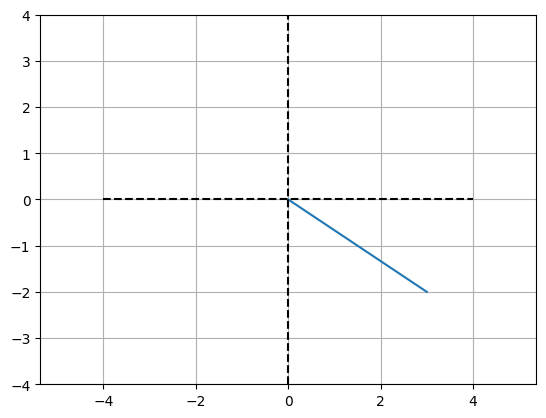

In [12]:
# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ 4, -3, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)


# plot the 2D vector
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()

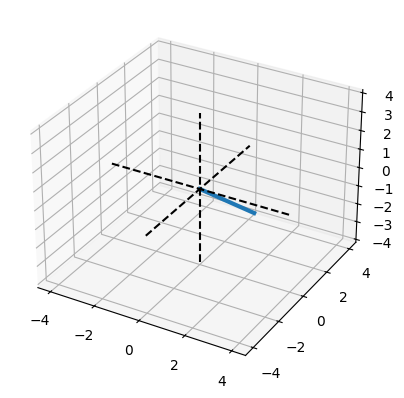

In [13]:
# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
# ax = fig.add_subplot(projection='3d')
ax = plt.axes(projection = '3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()